In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
import numpy as np 

In [69]:
#Tasks, start, end, and assigned as strings. Completion as percentage/100 
df=pd.DataFrame(columns=['Task','Start','End','Assigned','Completion'])
Items=[
    
    #General Tasks and Events 
    ['Technology Review','2021-11-15','2021-11-16','General',0],
    ['Standup1','2021-11-22','2021-11-23','General',0],
    ['Standup2','2021-11-29','2021-11-30','General',0],
    ['Final Presentation','2021-12-15','2021-12-16','General',0],
    ['Explore Visualization Options','2021-11-4','2021-11-11','General',.10],
    
    #Still working on breaking these down 
    ['Import Irradiance Data','2021-11-4','2021-12-1','General',0],
    ['Process Load Profile','2021-11-4','2021-12-1','General',0],
    ['Determine Breakdown of Equipment Based on Irradiance and Load','2021-11-4','2021-12-1','General',0],
    ['Create Cost Function','2021-11-4','2021-12-1','General',0],
    ['Visualize Results','2021-11-4','2021-12-1','General',0],
    ['Add Irradiance Changes/Modeling Components','2021-11-4','2021-12-1','General',0],
    
    #Assigned Tasks 
    ['Review of Old Code','2021-11-4','2021-11-11','Cassidy',.10],
    
    ['C','2021-11-3','2021-12-18','Clayton',0],
    
    ['D','2021-11-3','2021-12-18','Lindsey',0],
    
    ['E','2021-11-3','2021-12-18','Ning',0],
    
    ]

for i,Dat in enumerate(Items[::-1]):
    df.loc[i]=Dat

#convert strings to datetime fields:
df['Start_dt']=pd.to_datetime(df.Start)
df['End_dt']=pd.to_datetime(df.End)

In [70]:
# project start date
proj_start = df.Start_dt.min()
# number of days from project start to task start
df['start_num'] = (df.Start_dt-proj_start).dt.days
# number of days from project start to end of tasks
df['end_num'] = (df.End_dt-proj_start).dt.days
# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

In [71]:
# create a column with the color for each department
def colorcolm(row):
    c_dict = {'General':'#E64646', 'Cassidy':'#E69646', 'Clayton':'#34D05C', 'Lindsey':'#34D0C3', 'Ning':'#3475D0'}
    return c_dict[row['Assigned']]

df['color'] = df.apply(colorcolm, axis=1)

In [72]:
# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Completion)

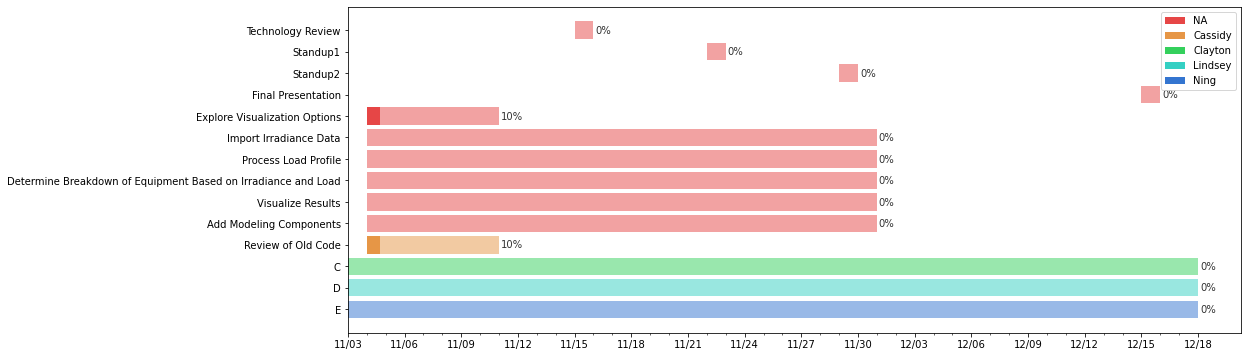

In [73]:
fig, ax = plt.subplots(1, figsize=(16,6))
# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)
# texts
for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, 
            f"{int(row.Completion*100)}%", 
            va='center', alpha=0.8)
##### LEGENDS #####
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])
plt.show()